In [1]:
# Install required packages quietly
!pip install -q openai anthropic mistralai

In [ ]:
# Import necessary modules
import os
from utils import common
from experiment_resources.questionnaires import BFI44 # You can replace this with another questionnaire
import experiment_functions.questionnaire as questionnaire
import experiment_functions.qa_text_generation as qa_text_generation
import utils.qa_classifier as qa_classifier

In [2]:
# Set API keys for the models you intend to use in the experiments
os.environ['OPENAI_API_KEY'] = 'your_openai_api_key'
os.environ['ANTHROPIC_API_KEY'] = 'your_anthropic_api_key'
os.environ['MISTRAL_API_KEY'] = 'your_mistral_api_key'

In [6]:
# Initialize common settings
common.initialize()

# Define experiment settings

In [9]:
# Questionnaire experiment settings
questionnaire_settings = {
    'models': {
        'gpt-3.5-turbo': {'temperature': 0.7},
        'gpt-4o': {'temperature': 0}
        # Add more models here if needed or change temperature
    },
    'questionnaire_module': BFI44  # You can replace this with another questionnaire
}

# Text generation experiment settings
text_generation_settings = {
    'models': {
        'gpt-3.5-turbo': {'temperatures': [0.7]}
        # Add more models and temperatures here if needed
    },
    'questions_file': 'questions.csv'
}

# Visualization settings
visualization_settings = {
    'trait_name_mapping': {  # Mapping of trait names
        'Agreeableness': 'Agreeableness',
        'Conscientiousness': 'Conscientiousness',
        'Extraversion': 'Extraversion',
        'Neuroticism': 'Neuroticism',
        'Openness': 'Openness to experience'
    },
    'model_name_mapping': {  # Mapping of model names
        'gpt-3.5-turbo': 'GPT-3.5 Turbo',
        'gpt-4': 'GPT-4',
        # Add other models if necessary
    }
}

# Classifier settings
text_analysis_settings = {
    'model_name': 'gpt-4o',
    'temperature': 0
}

# Step 1. Questionnaire

In [7]:
# Run the process of LLMs questionnaire answering
questionnaire.run_experiment(questionnaire_settings)

Experiment saved: Model=gpt-3.5-turbo, Temperature=0.7, Answers File=results/questionnaire_20241111_180643/answers_gpt-3.5-turbo.csv, Results File=results/questionnaire_20241111_180643/results_gpt-3.5-turbo.csv
                    trait trait_score     score
0  Openness to Experience        high  2.200000
1  Openness to Experience         low  2.800000
2       Conscientiousness        high  2.111111
3       Conscientiousness         low  2.888889
4            Extraversion        high  2.375000
5            Extraversion         low  3.750000
6           Agreeableness        high  3.222222
7           Agreeableness         low  3.000000
8             Neuroticism        high  2.500000
9             Neuroticism         low  3.125000
Experiment saved: Model=gpt-4o, Temperature=0, Answers File=results/questionnaire_20241111_180643/answers_gpt-4o.csv, Results File=results/questionnaire_20241111_180643/results_gpt-4o.csv
                    trait trait_score     score
0  Openness to Experience

Questionnaire visualization saved to results/questionnaire_20241111_180643/histograms.pdf


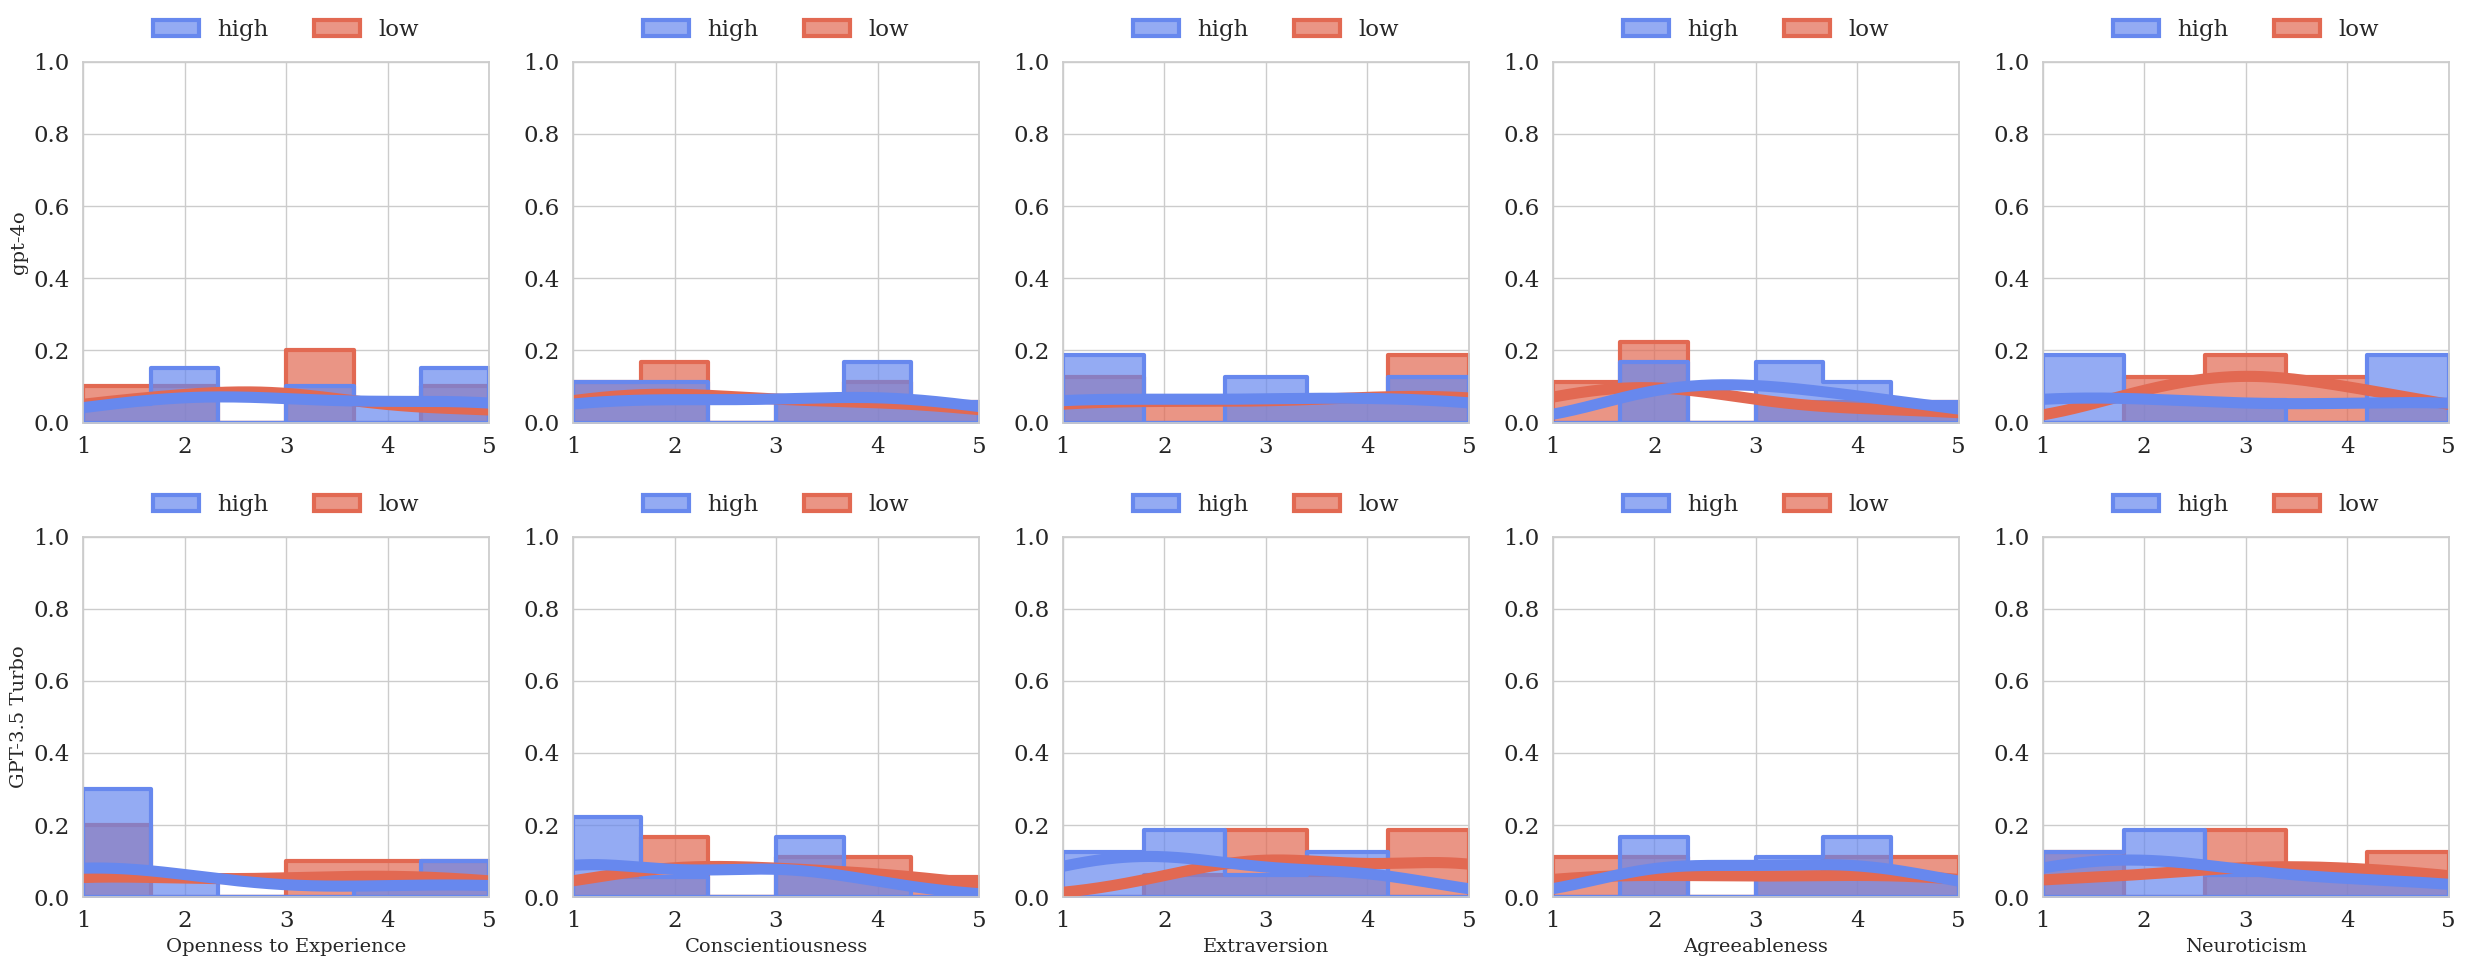

In [8]:
# Visualize results
questionnaire.visualize_results(
    df_answers='last', # Use 'last' for the last experiment or specify an experiment folder name (e.g, 'questionnaire_20241111_180643')
    visualization_settings=visualization_settings,
    visualization_type='histogram'
)

# Step 2. Text Generation

In [8]:
# Run the process of text generation experiment
qa_text_generation.run_experiment(text_generation_settings)

Quesions have been loaded
Generated texts files:
results/qa_text_generation_20241111_182218/texts_gpt-3.5-turbo_temp_0.7.csv


In [11]:
# Run the process of personality detection by LLM-based classifier
qa_classifier.run_analysis(
    df_answers='last', # Use 'last' for the last experiment or specify an experiment folder name (e.g, 'qa_text_generation_20241111_182218')
    settings=text_analysis_settings
)

['results/qa_text_generation_20241111_182218/texts_gpt-3.5-turbo_temp_0.7.csv']
Analyzed files:
results/qa_text_generation_20241111_182218/analysis_texts_gpt-3.5-turbo_temp_0.7.csv


Confusion matrix saved: results/qa_text_generation_20241111_182218/confusion_matrices.pdf


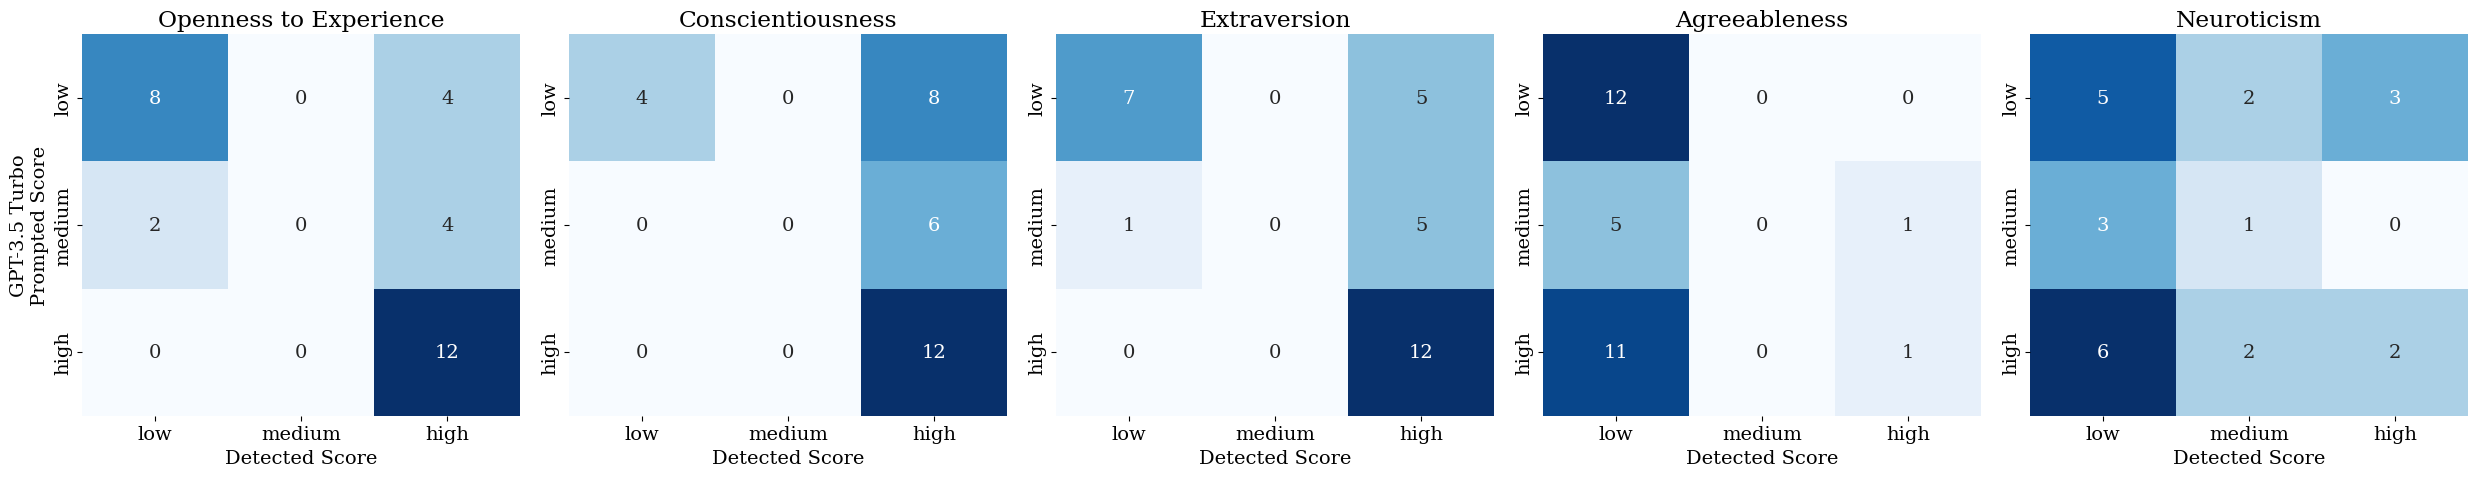

In [13]:
# Visualize the results
qa_text_generation.visualize_results(
    df_answers='last', # Use 'last' for the last experiment or specify an experiment folder name (e.g, 'qa_text_generation_20241111_182218')
    visualization_settings=visualization_settings,
    visualization_type='confusion matrices' # Options: 'confusion matrices', 'similarity'
)